/home/hk-project-test-p0021478/cc7738/anaconda3/envs/TAG-LP/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   edge_index0  edge_index1      pred   gr
0          927         1900  0.987534  1.0
1         1658         2044  0.965989  1.0
2          218          490  0.282045  1.0
3          223          702  1.000000  1.0
4          575         1241  0.067818  1.0


20it [00:00, 24.66it/s]
20it [00:00, 24.63it/s]


{'mrr_hit0.1': tensor(0.7115), 'mrr_hit0.2': tensor(0.8775), 'mrr_hit0.3': tensor(0.9328), 'mrr_hit0.5': tensor(0.9407), 'mrr_hit1.0': tensor(1.)}
{'AUC': 0.903, 'AP': 0.8971}
{'mrr_hit25': tensor(0.0040), 'mrr_hit50': tensor(0.0040), 'mrr_hit75': tensor(0.0040), 'mrr_hit126': tensor(0.0356), 'mrr_hit253': tensor(1.)}


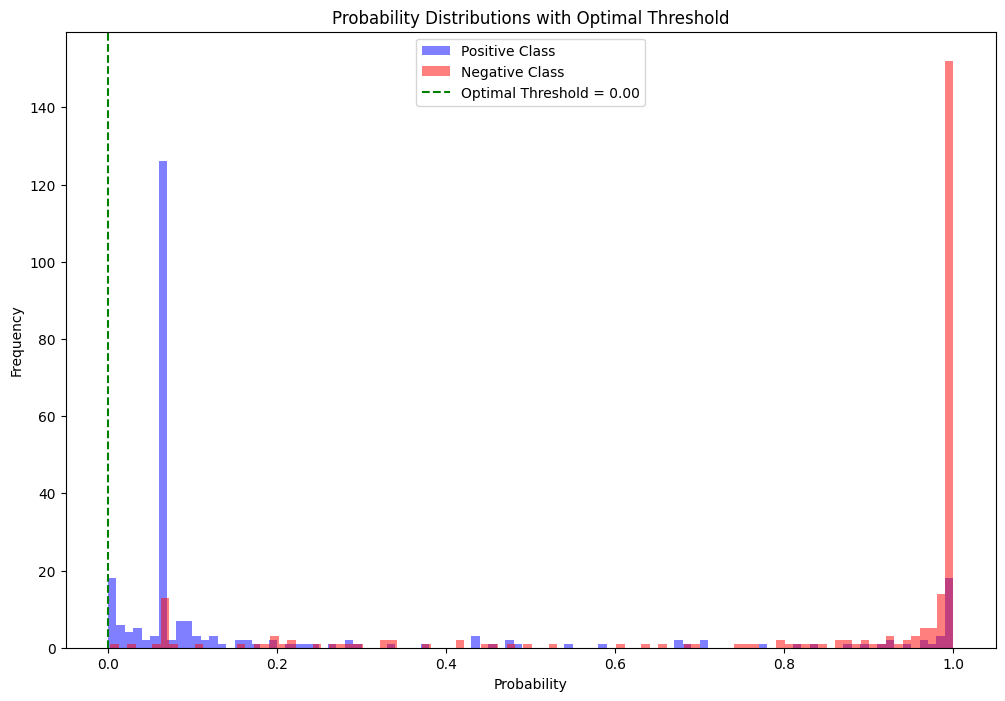

<Figure size 640x480 with 0 Axes>

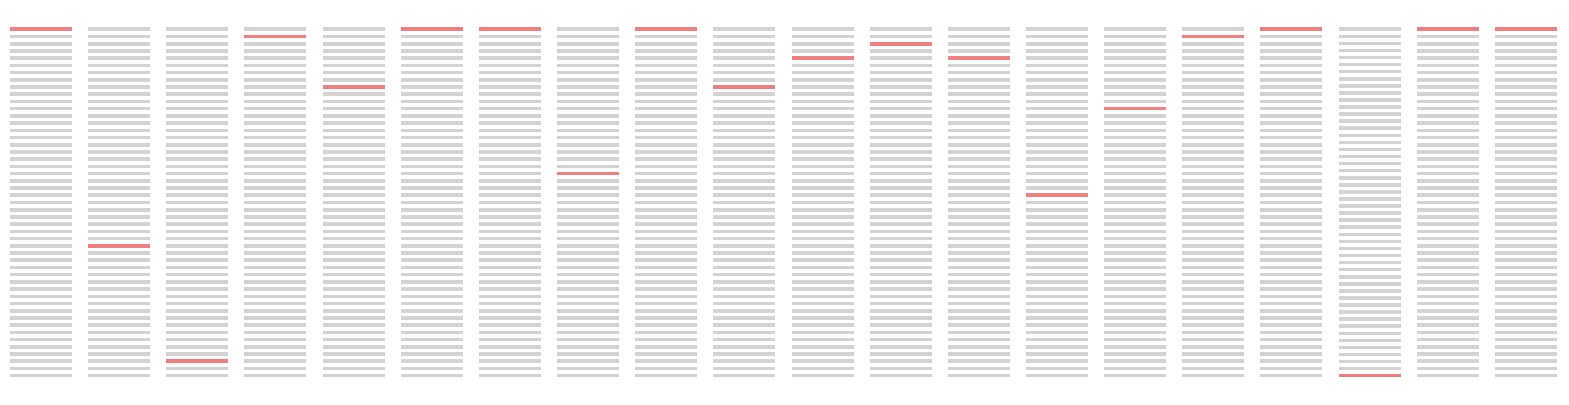

<Figure size 640x480 with 0 Axes>

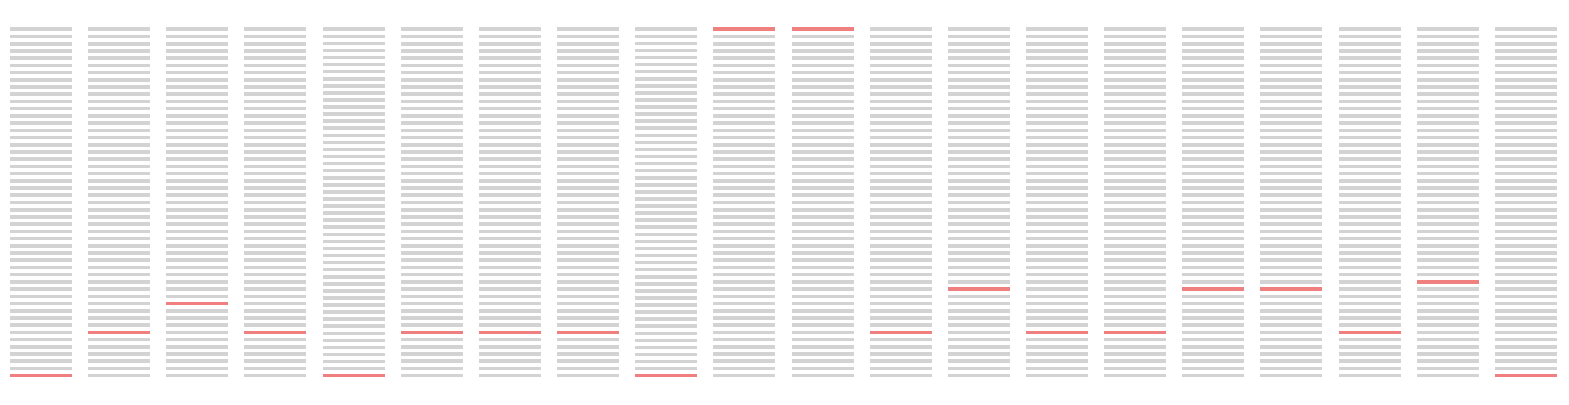

In [1]:
import pandas as pd
from ogb.linkproppred import PygLinkPropPredDataset, Evaluator
import torch 
from visual import find_optimal_threshold, get_metric_invariant
from matplotlib import pyplot as plt

def load_csv(file_path):
    """
    Load a CSV file into a pandas DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the data from the CSV file.
    """
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: There was an issue parsing the file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
FILE_PATH = '/hkfs/work/workspace/scratch/cc7738-benchmark_tag/educational_demo/'
file_path = FILE_PATH + 'err_ncnc_llama/llama-cora-origin_dot_AUC_0.903_MRR_0.228.csv'
data = load_csv(file_path)

if data is not None:
    print(data.head())  # Print the first few rows of the DataFrame
    
import matplotlib.pyplot as plt

# evaluator = Evaluator(name='ogbl-collab')
evaluator_hit = Evaluator(name='ogbl-collab')
evaluator_mrr = Evaluator(name='ogbl-citation2')

pred = data['pred'].tolist()
gr = data['gr'].tolist()
source = data['edge_index0'].tolist()
target = data['edge_index1'].tolist()

pos_mask = data[data['gr'] == 1.0]
pos_index = pos_mask[['edge_index0', 'edge_index1']]

neg_mask = data[data['gr'] == 0.0]
neg_index = neg_mask[['edge_index0', 'edge_index1']]

P2 = neg_mask['pred'].to_numpy()
P1 = pos_mask['pred'].to_numpy()

plt.figure(figsize=(12, 8))

# Plot distributions of probabilities
plt.hist(P2, bins=100, alpha=0.5, color='blue', label='Positive Class')
plt.hist(P1, bins=100, alpha=0.5, color='red', label='Negative Class')
best_threshold, best_accuracy= find_optimal_threshold(P2, P1)

plt.axvline(best_threshold, color='green', linestyle='--', label=f'Optimal Threshold = {best_threshold:.2f}')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Probability Distributions with Optimal Threshold')
plt.savefig('optimal_threshold.png')


k_list  = [0.1, 0.2, 0.3, 0.5, 1]
pos_index = torch.tensor(pos_index.to_numpy())
neg_index = torch.tensor(neg_index.to_numpy())
P1 = torch.tensor(P1)
P2 = torch.tensor(P2)
mrr_pos2neg, mrr_neg2pos, result_auc_test, pos_edge_index_err, pos_rank_err, neg_edge_index_err, neg_rank_err = get_metric_invariant(P1, pos_index, P2, neg_index, k_list)

print(mrr_pos2neg)
print(result_auc_test)
print(mrr_neg2pos)


In [2]:
import os
import sys

# Assuming your target directory is one level up from the current working directory
notebook_dir = os.getcwd()  
target_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

sys.path.insert(0, target_dir)
from core.data_utils.load import load_data_lp
from core.graphgps.utility.utils import init_cfg_test

cfg = init_cfg_test()

In [3]:
cfg.data.name

'cora'

In [7]:
splits, text, data = load_data_lp[cfg.data.name](cfg.data)

not loaded 0 papers.
create graph: 0.1190650463104248
[2485]
original num of nodes: 2485
num of nodes after lcc: 2485
num of edges after lcc: 10138
num of texts in dataset: 2485


In [8]:
for row in pos_edge_index_err:
    print(f'source: {text[row[0]]}, \n target: {text[row[1]]}')

source: Title: On Convergence Properties of the EM Algorithm for Gaussian Mixtures  
Abstract: We build up the mathematical connection between the "Expectation-Maximization" (EM) algorithm and gradient-based approaches for maximum likelihood learning of finite Gaussian mixtures. We show that the EM step in parameter space is obtained from the gradient via a projection matrix P , and we provide an explicit expression for the matrix. We then analyze the convergence of EM in terms of special properties of P and provide new results analyzing the effect that P has on the likelihood surface. Based on these mathematical results, we present a comparative discussion of the advantages and disadvantages of EM and other algorithms for the learning of Gaussian mixture models. This report describes research done at the Center for Biological and Computational Learning and the Artificial Intelligence Laboratory of the Massachusetts Institute of Technology. Support for the Center is provided in part by

In [9]:
from IPython.display import display, Markdown


for row in pos_edge_index_err:
    src = text[row[0]]
    tgt = text[row[1]]
    display(Markdown(f"**Source:** {src}  \n**Target:** {tgt}"))

**Source:** Title: On Convergence Properties of the EM Algorithm for Gaussian Mixtures  
Abstract: We build up the mathematical connection between the "Expectation-Maximization" (EM) algorithm and gradient-based approaches for maximum likelihood learning of finite Gaussian mixtures. We show that the EM step in parameter space is obtained from the gradient via a projection matrix P , and we provide an explicit expression for the matrix. We then analyze the convergence of EM in terms of special properties of P and provide new results analyzing the effect that P has on the likelihood surface. Based on these mathematical results, we present a comparative discussion of the advantages and disadvantages of EM and other algorithms for the learning of Gaussian mixture models. This report describes research done at the Center for Biological and Computational Learning and the Artificial Intelligence Laboratory of the Massachusetts Institute of Technology. Support for the Center is provided in part by a grant from the National Science Foundation under contract ASC-9217041. Support for the laboratory's artificial intelligence research is provided in part by the Advanced Research Projects Agency of the Department of Defense under Office of Naval Research contract N00000-00-A-0000. The authors were also supported by the HK RGC Earmarked Grant CUHK250/94E, by a grant from the McDonnell-Pew Foundation, by a grant from ATR Human Information Processing Research Laboratories, by a grant from Siemens Corporation, and by grant N00014-90-1-0777 from the Office of Naval Research. Michael I. Jordan is an NSF Presidential Young Investigator.   
**Target:** Title: On Convergence of the EM Algorithm and the Gibbs Sampler  SUMMARY  
Abstract: In this article we investigate the relationship between the two popular algorithms, the EM algorithm and the Gibbs sampler. We show that the approximate rate of convergence of the Gibbs sampler by Gaussian approximation is equal to that of the corresponding EM type algorithm. This helps in implementing either of the algorithms as improvement strategies for one algorithm can be directly transported to the other. In particular, by running the EM algorithm we know approximately how many iterations are needed for convergence of the Gibbs sampler. We also obtain a result that under conditions, the EM algorithm used for finding the maximum likelihood estimates can be slower to converge than the corresponding Gibbs sampler for Bayesian inference which uses proper prior distributions. We illustrate our results in a number of realistic examples all based on the generalized linear mixed models. 

**Source:** Title: Evolving Self-Supporting Structures Page 18 References Evolution of Visual Control Systems for Robots. To appear
Abstract: In this paper we are concerned with the problem of acquiring knowledge by integration. Our aim is to construct an integrated knowledge base from several separate sources. The need to merge knowledge bases can arise, for example, when knowledge bases are acquired independently from interactions with several domain experts. As opinions of different domain experts may differ, the knowledge bases constructed in this way will normally differ too. A similar problem can also arise whenever separate knowledge bases are generated by learning algorithms. The objective of integration is to construct one system that exploits all the knowledge that is available and has a good performance. The aim of this paper is to discuss the methodology of knowledge integration, describe the implemented system (INTEG.3), and present some concrete results which demonstrate the advantages of this method.   
**Target:** Title: Evolving Visually Guided Robots  
Abstract: A version of this paper appears in: Proceedings of SAB92, the Second International Conference on Simulation of Adaptive Behaviour J.-A. Meyer, H. Roitblat, and S. Wilson, editors, MIT Press Bradford Books, Cambridge, MA, 1993. 

**Source:** Title: Principal and Independent Components in Neural Networks Recent Developments  
Abstract: Nonlinear extensions of one-unit and multi-unit Principal Component Analysis (PCA) neural networks, introduced earlier by the authors, are reviewed. The networks and their nonlinear Hebbian learning rules are related to other signal expansions like Projection Pursuit (PP) and Independent Component Analysis (ICA). Separation results for mixtures of real world signals and im ages are given.  
**Target:** Title: An information-maximisation approach to blind separation and blind deconvolution  
Abstract: We derive a new self-organising learning algorithm which maximises the information transferred in a network of non-linear units. The algorithm does not assume any knowledge of the input distributions, and is defined here for the zero-noise limit. Under these conditions, information maximisation has extra properties not found in the linear case (Linsker 1989). The non-linearities in the transfer function are able to pick up higher-order moments of the input distributions and perform something akin to true redundancy reduction between units in the output representation. This enables the network to separate statistically independent components in the inputs: a higher-order generalisation of Principal Components Analysis. We apply the network to the source separation (or cocktail party) problem, successfully separating unknown mixtures of up to ten speakers. We also show that a variant on the network architecture is able to perform blind deconvolution (cancellation of unknown echoes and reverberation in a speech signal). Finally, we derive dependencies of information transfer on time delays. We suggest that information max-imisation provides a unifying framework for problems in `blind' signal processing. fl Please send comments to tony@salk.edu. This paper will appear as Neural Computation, 7, 6, 1004-1034 (1995). The reference for this version is: Technical Report no. INC-9501, February 1995, Institute for Neural Computation, UCSD, San Diego, CA 92093-0523. 

**Source:** Title: Genetic Programming of Minimal Neural Nets Using Occam's Razor  
Abstract: A genetic programming method is investigated for optimizing both the architecture and the connection weights of multilayer feedforward neural networks. The genotype of each network is represented as a tree whose depth and width are dynamically adapted to the particular application by specifically defined genetic operators. The weights are trained by a next-ascent hillclimb-ing search. A new fitness function is proposed that quantifies the principle of Occam's razor. It makes an optimal trade-off between the error fitting ability and the parsimony of the network. We discuss the results for two problems of differing complexity and study the convergence and scaling properties of the algorithm.  
**Target:** Title: Recombination Operator, its Correlation to the Fitness Landscape and Search Performance  
Abstract: The author reserves all other publication and other rights in association with the copyright in the thesis, and except as hereinbefore provided, neither the thesis nor any substantial portion thereof may be printed or otherwise reproduced in any material form whatever without the author's prior written permission. 

**Source:** Title: An evolutionary tabu search algorithm and the NHL scheduling problem  
Abstract: We present in this paper a new evolutionary procedure for solving general optimization problems that combines efficiently the mechanisms of genetic algorithms and tabu search. In order to explore the solution space properly interaction phases are interspersed with periods of optimization in the algorithm. An adaptation of this search principle to the National Hockey League (NHL) problem is discussed. The hybrid method developed in this paper is well suited for Open Shop Scheduling problems (OSSP). The results obtained appear to be quite satisfactory.   
**Target:** Title: Embedding of a sequential procedure within an evolutionary algorithm for coloring problems in graphs  
Abstract: Randomized, adaptive, greedy search using evolutionary algorithms offers a powerful and versatile approach to the automated design of neural network architectures for a variety of tasks in artificial intelligence and robotics. In this paper we present results from the evolutionary design of a neuro-controller for a robotic bulldozer. This robot is given the task of clearing an arena littered with boxes by pushing boxes to the sides. Through a careful analysis of the evolved networks we show how evolution exploits the design constraints and properties of the environment to produce network structures of high fitness. We conclude with a brief summary of related ongoing research examining the intricate interplay between environment and evolutionary processes in determining the structure and function of the resulting neural architectures.

**Source:** Title: Multivariate versus Univariate Decision Trees  
Abstract: COINS Technical Report 92-8 January 1992 Abstract In this paper we present a new multivariate decision tree algorithm LMDT, which combines linear machines with decision trees. LMDT constructs each test in a decision tree by training a linear machine and then eliminating irrelevant and noisy variables in a controlled manner. To examine LMDT's ability to find good generalizations we present results for a variety of domains. We compare LMDT empirically to a univariate decision tree algorithm and observe that when multivariate tests are the appropriate bias for a given data set, LMDT finds small accurate trees.   
**Target:** Title: Multivariate Decision Trees  
Abstract: COINS Technical Report 92-82 December 1992 Abstract Multivariate decision trees overcome a representational limitation of univariate decision trees: univariate decision trees are restricted to splits of the instance space that are orthogonal to the feature's axis. This paper discusses the following issues for constructing multivariate decision trees: representing a multivariate test, including symbolic and numeric features, learning the coefficients of a multivariate test, selecting the features to include in a test, and pruning of multivariate decision trees. We present some new and review some well-known methods for forming multivariate decision trees. The methods are compared across a variety of learning tasks to assess each method's ability to find concise, accurate decision trees. The results demonstrate that some multivariate methods are more effective than others. In addition, the experiments confirm that allowing multivariate tests improves the accuracy of the resulting decision tree over univariate trees. 

**Source:** Title: A utility-based approach to learning in a mixed Case-Based and Model-Based Reasoning architecture  
Abstract: Case-based reasoning (CBR) can be used as a form of "caching" solved problems to speedup later problem solving. Using "cached" cases brings additional costs with it due to retrieval time, case adaptation time and also storage space. Simply storing all cases will result in a situation in which retrieving and trying to adapt old cases will take more time (on average) than not caching at all. This means that caching must be applied selectively to build a case memory that is actually useful. This is a form of the utility problem [4, 2]. The approach taken here is to construct a "cost model" of a system that can be used to predict the effect of changes to the system. In this paper we describe the utility problem associated with "caching" cases and the construction of a "cost model". We present experimental results that demonstrate that the model can be used to predict the effect of certain changes to the case memory.  
**Target:** Title: A Comparative Utility Analysis of Case-Based Reasoning and Control-Rule Learning Systems  
Abstract: The utility problem in learning systems occurs when knowledge learned in an attempt to improve a system's performance degrades performance instead. We present a methodology for the analysis of utility problems which uses computational models of problem solving systems to isolate the root causes of a utility problem, to detect the threshold conditions under which the problem will arise, and to design strategies to eliminate it. We present models of case-based reasoning and control-rule learning systems and compare their performance with respect to the swamping utility problem. Our analysis suggests that case-based reasoning systems are more resistant to the utility problem than control-rule learning systems. 1

**Source:** Title: Achieving High-Accuracy Text-to-Speech with Machine Learning  
Abstract: In 1987, Sejnowski and Rosenberg developed their famous NETtalk system for English text-to-speech. This chapter describes a machine learning approach to text-to-speech that builds upon and extends the initial NETtalk work. Among the many extensions to the NETtalk system were the following: a different learning algorithm, a wider input "window", error-correcting output coding, a right-to-left scan of the word to be pronounced (with the results of each decision influencing subsequent decisions), and the addition of several useful input features. These changes yielded a system that performs much better than the original NETtalk system. After training on 19,002 words, the system achieves 93.7% correct pronunciation of individual phonemes and 64.8% correct pronunciation of whole words (where the pronunciation must exactly match the dictionary pronunciation to be correct). Based on the judgements of three human participants in a blind assessment study, our system was estimated to have a serious error rate of 16.7% (on whole words) compared to an error rate of 26.1% for the DECTalk3.0 rulebase.  
**Target:** Title: A Comparative Study of ID3 and Backpropagation for English Text-to-Speech Mapping  
Abstract: The performance of the error backpropagation (BP) and ID3 learning algorithms was compared on the task of mapping English text to phonemes and stresses. Under the distributed output code developed by Sejnowski and Rosenberg, it is shown that BP consistently out-performs ID3 on this task by several percentage points. Three hypotheses explaining this difference were explored: (a) ID3 is overfitting the training data, (b) BP is able to share hidden units across several output units and hence can learn the output units better, and (c) BP captures statistical information that ID3 does not. We conclude that only hypothesis (c) is correct. By augmenting ID3 with a simple statistical learning procedure, the performance of BP can be approached but not matched. More complex statistical procedures can improve the performance of both BP and ID3 substantially. A study of the residual errors suggests that there is still substantial room for improvement in learning methods for text-to-speech mapping.

**Source:** Title: Theory Refinement Combining Analytical and Empirical Methods  
Abstract: This article describes a comprehensive approach to automatic theory revision. Given an imperfect theory, the approach combines explanation attempts for incorrectly classified examples in order to identify the failing portions of the theory. For each theory fault, correlated subsets of the examples are used to inductively generate a correction. Because the corrections are focused, they tend to preserve the structure of the original theory. Because the system starts with an approximate domain theory, in general fewer training examples are required to attain a given level of performance (classification accuracy) compared to a purely empirical system. The approach applies to classification systems employing a propositional Horn-clause theory. The system has been tested in a variety of application domains, and results are presented for problems in the domains of molecular biology and plant disease diagnosis.   
**Target:** Title: Utilising Explanation to Assist the Refinement of Knowledge-Based Systems  
Abstract: Standard statistical practice ignores model uncertainty. Data analysts typically select a model from some class of models and then proceed as if the selected model had generated the data. This approach ignores the uncertainty in model selection, leading to over-confident inferences and decisions that are more risky than one thinks they are. Bayesian model averaging (BMA) provides a coherent mechanism for accounting for this model uncertainty. Several methods for implementing BMA have recently emerged. We discuss these methods and present a number of examples. In these examples, BMA provides improved out-of-sample predictive performance. We also provide a catalogue of currently available BMA software. 

**Source:** Title: Smoothing Spline ANOVA for Exponential Families, with Application to the Wisconsin Epidemiological Study of Diabetic
Abstract: In this paper I give a review of ensemble learning using a simple example.   
**Target:** Title: A Generalized Approximate Cross Validation for Smoothing Splines with Non-Gaussian Data 1  
Abstract: Multiple-instance learning is a variation on supervised learning, where the task is to learn a concept given positive and negative bags of instances. Each bag may contain many instances, but a bag is labeled positive even if only one of the instances in it falls within the concept. A bag is labeled negative only if all the instances in it are negative. We describe a new general framework, called Diverse Density, for solving multiple-instance learning problems. We apply this framework to learn a simple description of a person from a series of images (bags) containing that person, to a stock selection problem, and to the drug activity prediction problem.

**Source:** Title: An Improved Model for Spatially Correlated Binary Responses  
Abstract: In this paper we extend the basic autologistic model to include covariates and an indication of sampling effort. The model is applied to sampled data instead of the traditional use for image analysis where complete data are available. We adopt a Bayesian set-up and develop a hybrid Gibbs sampling estimation procedure. Using simulated examples, we show that the autologistic model with covariates for sample data improves predictions as compared to the simple logistic regression model and the standard autologistic model (without covariates).   
**Target:** Title: Bayesian Model Averaging  
Abstract: Standard statistical practice ignores model uncertainty. Data analysts typically select a model from some class of models and then proceed as if the selected model had generated the data. This approach ignores the uncertainty in model selection, leading to over-confident inferences and decisions that are more risky than one thinks they are. Bayesian model averaging (BMA) provides a coherent mechanism for accounting for this model uncertainty. Several methods for implementing BMA have recently emerged. We discuss these methods and present a number of examples. In these examples, BMA provides improved out-of-sample predictive performance. We also provide a catalogue of currently available BMA software. 

**Source:** Title: Data Mining for Association Rules with Unsupervised Neural Networks  
Abstract: results for Gaussian mixture models and factor analysis are discussed.   
**Target:** Title: The EM Algorithm for Mixtures of Factor Analyzers  
Abstract: Technical Report CRG-TR-96-1 May 21, 1996 (revised Feb 27, 1997) Abstract Factor analysis, a statistical method for modeling the covariance structure of high dimensional data using a small number of latent variables, can be extended by allowing different local factor models in different regions of the input space. This results in a model which concurrently performs clustering and dimensionality reduction, and can be thought of as a reduced dimension mixture of Gaussians. We present an exact Expectation-Maximization algorithm for fitting the parameters of this mixture of factor analyzers.

**Source:** Title: Induction of Multiscale Temporal Structure  
Abstract: Learning structure in temporally-extended sequences is a difficult computational problem because only a fraction of the relevant information is available at any instant. Although variants of back propagation can in principle be used to find structure in sequences, in practice they are not sufficiently powerful to discover arbitrary contingencies, especially those spanning long temporal intervals or involving high order statistics. For example, in designing a connectionist network for music composition, we have encountered the problem that the net is able to learn musical structure that occurs locally in time|e.g., relations among notes within a musical phrase|but not structure that occurs over longer time periods|e.g., relations among phrases. To address this problem, we require a means of constructing a reduced description of the sequence that makes global aspects more explicit or more readily detectable. I propose to achieve this using hidden units that operate with different time constants. Simulation experiments indicate that slower time-scale hidden units are able to pick up global structure, structure that simply can not be learned by standard Many patterns in the world are intrinsically temporal, e.g., speech, music, the unfolding of events. Recurrent neural net architectures have been devised to accommodate time-varying sequences. For example, the architecture shown in Figure 1 can map a sequence of inputs to a sequence of outputs. Learning structure in temporally-extended sequences is a difficult computational problem because the input pattern may not contain all the task-relevant information at any instant. Thus, back propagation.  
**Target:** Title: Learning Sequential Tasks by Incrementally Adding Higher Orders  
Abstract: An incremental, higher-order, non-recurrent network combines two properties found to be useful for learning sequential tasks: higher-order connections and incremental introduction of new units. The network adds higher orders when needed by adding new units that dynamically modify connection weights. Since the new units modify the weights at the next time-step with information from the previous step, temporal tasks can be learned without the use of feedback, thereby greatly simplifying training. Furthermore, a theoretically unlimited number of units can be added to reach into the arbitrarily distant past. Experiments with the Reber grammar have demonstrated speedups of two orders of magnitude over recurrent networks.

**Source:** Title: Naive Bayesian classifier within ILP-R  
Abstract: When dealing with the classification problems, current ILP systems often lag behind state-of-the-art attributional learners. Part of the blame can be ascribed to a much larger hypothesis space which, therefore, cannot be as thoroughly explored. However, sometimes it is due to the fact that ILP systems do not take into account the probabilistic aspects of hypotheses when classifying unseen examples. This paper proposes just that. We developed a naive Bayesian classifier within our ILP-R first order learner. The learner itself uses a clever RELIEF based heuristic which is able to detect strong dependencies within the literal space when such dependencies exist. We conducted a series of experiments on artificial and real-world data sets. The results show that the combination of ILP-R together with the naive Bayesian classifier sometimes significantly improves the classification of unseen instances as measured by both classification accuracy and average information score.  
**Target:** Title: An application of ILP in a musical database: learning to compose the two-voice counterpoint  
Abstract: We describe SFOIL, a descendant of FOIL that uses the advanced stochastic search heuristic, and its application in learning to compose the two-voice counterpoint. The application required learning a 4-ary relation from more than 20.000 training instances. SFOIL is able to efficiently deal with this learning task which is to our knowledge one of the most complex learning task solved by an ILP system. This demonstrates that ILP systems can scale up to real databases and that top-down ILP systems that use the covering approach and advanced search strategies are appropriate for knowledge discovery in databases and are promising for further investigation. 

**Source:** Title: A Memory Model for Case Retrieval by Activation Passing  
Abstract: We present a tree-structured architecture for supervised learning. The statistical model underlying the architecture is a hierarchical mixture model in which both the mixture coefficients and the mixture components are generalized linear models (GLIM's). Learning is treated as a maximum likelihood problem; in particular, we present an Expectation-Maximization (EM) algorithm for adjusting the parameters of the architecture. We also develop an on-line learning algorithm in which the parameters are updated incrementally. Comparative simulation results are presented in the robot dynamics domain. This report describes research done at the Dept. of Brain and Cognitive Sciences, the Center for Biological and Computational Learning, and the Artificial Intelligence Laboratory of the Massachusetts Institute of Technology. Support for CBCL is provided in part by a grant from the NSF (ASC-9217041). Support for the laboratory's artificial intelligence research is provided in part by the Advanced Research Projects Agency of the Dept. of Defense. The authors were supported by a grant from the McDonnell-Pew Foundation, by a grant from ATR Human Information Processing Research Laboratories, by a grant from Siemens Corporation, by by grant IRI-9013991 from the National Science Foundation, by grant N00014-90-J-1942 from the Office of Naval Research, and by NSF grant ECS-9216531 to support an Initiative in Intelligent Control at MIT. Michael I. Jordan is a NSF Presidential Young Investigator.   
**Target:** Title: Case Retrieval Nets Applied to Large Case Bases  
Abstract: This article presents some experimental results obtained from applying the Case Retrieval Net approach to large case bases. The obtained results suggest that CRNs can successfully handle case bases larger than considered in other reports.

**Source:** Title: Abstraction and Decomposition in Hillclimbing Design Optimization  
Abstract: The performance of hillclimbing design optimization can be improved by abstraction and decomposition of the design space. Methods for automatically finding and exploiting such abstractions and decompositions are presented in this paper. A technique called "Operator Importance Analysis" finds useful abstractions. It does so by determining which of a given set of operators are the most important for a given class of design problems. Hillclimbing search runs faster when performed using this this smaller set of operators. A technique called "Operator Interaction Analysis" finds useful decompositions. It does so by measuring the pairwise interaction between operators. It uses such measurements to form an ordered partition of the operator set. This partition can then be used in a "hierarchic" hillclimbing algorithm which runs faster than ordinary hillclimbing with an unstructured operator set. We have implemented both techniques and tested them in the domain of racing yacht hull design. Our experimental results show that these two methods can produce substantial speedups with little or no loss in quality of the resulting designs.   
**Target:** Title: Learning Prototype-Selection Rules for Case-Based Iterative Design seen as a case-based reasoning system [4], in
Abstract: The first step for most case-based design systems is to select an initial prototype from a database of previous designs. The retrieved prototype is then modified to tailor it to the given goals. For any particular design goal the selection of a starting point for the design process can have a dramatic effect both on the quality of the eventual design and on the overall design time. We present a technique for automatically constructing effective prototype-selection rules. Our technique applies a standard inductive-learning algorithm, C4.5, to a set of training data describing which particular prototype would have been the best choice for each goal encountered in a previous design session. We have tested our technique in the domain of racing-yacht-hull design, comparing our inductively learned selection rules to several competing prototype-selection methods. Our results show that the inductive prototype-selection method leads to better final designs when the design process is guided by a noisy evaluation function, and that the inductively learned rules will often be more efficient than competing methods. Many automated design systems begin by retrieving an initial prototype from a library of previous designs, using the given design goal as an index to guide the retrieval process [14]. The retrieved prototype is then modified by a set of design modification operators to tailor the selected design to the given goals. In many cases the quality of competing designs can be assessed using domain-specific evaluation functions, and in such cases the design-modification process is often This research has benefited from numerous discussions with members of the Rutgers CAP project. We thank Andrew Gelsey for helping with the cross-validation code, John Keane for helping with RUVPP, and Andrew Gelsey and Tim Weinrich for comments on a previous draft of this paper. This research was supported under ARPA-funded NASA grant NAG 2-645. In the context of such case-based design systems, the choice of an initial prototype can affect both the quality of the final design and the computational cost of obtaining that design, for three reasons. First, prototype selection may impact quality when the prototypes lie in disjoint search spaces. In particular, if the system's design modification operators cannot convert any prototype into any other prototype, the choice of initial prototype will restrict the set of possible designs that can be obtained by any search process. A poor choice of initial prototype may therefore lead to a suboptimal final design. Second, prototype selection may impact quality when the design process is guided by a nonlinear evaluation function with unknown global properties. Since there is no known method that is guaranteed to find the global optimum of an arbitrary nonlinear function [7], most design systems rely on iterative local search methods whose results are sensitive to the initial starting point. Finally, the choice of prototype may have an impact on the time needed to carry out the design modification process|two different starting points may yield the same final design but take very different amounts of time to get there. In design problems where evaluating even just a single design can take tremendous amounts of time, selecting an appropriate initial prototype can be the determining factor in the success or failure of the design process. This paper describes the application of inductive learning [11] to form rules for selecting appropriate prototype designs. The paper is structured as follows. In Section 2, we describe our inductive method for learning prototype-selection rules. In Section 3 we describe the domain of racing-yacht-hull design, in which we tested our prototype-selection methods. In Sections 4 and 5, we describe the experiments 

**Source:** Title: Bias-Driven Revision of Logical Domain Theories  
Abstract: The theory revision problem is the problem of how best to go about revising a deficient domain theory using information contained in examples that expose inaccuracies. In this paper we present our approach to the theory revision problem for propositional domain theories. The approach described here, called PTR, uses probabilities associated with domain theory elements to numerically track the ``ow'' of proof through the theory. This allows us to measure the precise role of a clause or literal in allowing or preventing a (desired or undesired) derivation for a given example. This information is used to efficiently locate and repair awed elements of the theory. PTR is proved to converge to a theory which correctly classifies all examples, and shown experimentally to be fast and accurate even for deep theories.  
**Target:** Title: Combining Connectionist and Symbolic Learning to Refine Certainty-Factor Rule Bases  
Abstract: This paper describes Rapture | a system for revising probabilistic knowledge bases that combines connectionist and symbolic learning methods. Rapture uses a modified version of backpropagation to refine the certainty factors of a probabilistic rule base and it uses ID3's information-gain heuristic to add new rules. Results on refining three actual expert knowledge bases demonstrate that this combined approach generally performs better than previous methods. 

**Source:** Title: Learning and evolution in neural networks  
Abstract: DIMACS Technical Report 96-56 December 1996   
**Target:** Title: Evolving nonTrivial Behaviors on Real Robots: an Autonomous Robot that Picks up Objects  
Abstract: Recently, a new approach that involves a form of simulated evolution has been proposed for the building of autonomous robots. However, it is still not clear if this approach may be adequate to face real life problems. In this paper we show how control systems that perform a nontrivial sequence of behaviors can be obtained with this methodology by carefully designing the conditions in which the evolutionary process operates. In the experiment described in the paper, a mobile robot is trained to locate, recognize, and grasp a target object. The controller of the robot has been evolved in simulation and then downloaded and tested on the real robot. 

**Source:** Title: Toward Efficient Agnostic Learning  
Abstract: In this paper we initiate an investigation of generalizations of the Probably Approximately Correct (PAC) learning model that attempt to significantly weaken the target function assumptions. The ultimate goal in this direction is informally termed agnostic learning, in which we make virtually no assumptions on the target function. The name derives from the fact that as designers of learning algorithms, we give up the belief that Nature (as represented by the target function) has a simple or succinct explanation. We give a number of positive and negative results that provide an initial outline of the possibilities for agnostic learning. Our results include hardness results for the most obvious generalization of the PAC model to an agnostic setting, an efficient and general agnostic learning method based on dynamic programming, relationships between loss functions for agnostic learning, and an algorithm for a learning problem that involves hidden variables.   
**Target:** Title: PAC Learning Intersections of Halfspaces with Membership Queries (Extended Abstract)  
Abstract:  

**Source:** Title: Bayesian Mixture Modeling by Monte Carlo Simulation  
Abstract: It is shown that Bayesian inference from data modeled by a mixture distribution can feasibly be performed via Monte Carlo simulation. This method exhibits the true Bayesian predictive distribution, implicitly integrating over the entire underlying parameter space. An infinite number of mixture components can be accommodated without difficulty, using a prior distribution for mixing proportions that selects a reasonable subset of components to explain any finite training set. The need to decide on a "correct" number of components is thereby avoided. The feasibility of the method is shown empirically for a simple classification task.   
**Target:** Title: Bayesian Methods for Adaptive Models  
Abstract: Almost all the work in Average-reward Re- inforcement Learning (ARL) so far has focused on table-based methods which do not scale to domains with large state spaces. In this paper, we propose two extensions to a model-based ARL method called H-learning to address the scale-up problem. We extend H-learning to learn action models and reward functions in the form of Bayesian networks, and approximate its value function using local linear regression. We test our algorithms on several scheduling tasks for a simulated Automatic Guided Vehicle (AGV) and show that they are effective in significantly reducing the space requirement of H-learning and making it converge faster. To the best of our knowledge, our results are the first in apply 

**Source:** Title: INFERENTIAL THEORY OF LEARNING: Developing Foundations for Multistrategy Learning  
Abstract: The development of multistrategy learning systems should be based on a clear understanding of the roles and the applicability conditions of different learning strategies. To this end, this chapter introduces the Inferential Theory of Learning that provides a conceptual framework for explaining logical capabilities of learning strategies, i.e., their competence. Viewing learning as a process of modifying the learners knowledge by exploring the learners experience, the theory postulates that any such process can be described as a search in a knowledge space, triggered by the learners experience and guided by learning goals. The search operators are instantiations of knowledge transmutations, which are generic patterns of knowledge change. Transmutations may employ any basic type of inferencededuction, induction or analogy. Several fundamental knowledge transmutations are described in a novel and general way, such as generalization, abstraction, explanation and similization, and their counterparts, specialization, concretion, prediction and dissimilization, respectively. Generalization enlarges the reference set of a description (the set of entities that are being described). Abstraction reduces the amount of the detail about the reference set. Explanation generates premises that explain (or imply) the given properties of the reference set. Similization transfers knowledge from one reference set to a similar reference set. Using concepts of the theory, a multistrategy task-adaptive learning (MTL) methodology is outlined, and illustrated b y an example. MTL dynamically adapts strategies to the learning task, defined by the input information, learners background knowledge, and the learning goal. It aims at synergistically integrating a whole range of inferential learning strategies, such as empirical generalization, constructive induction, deductive generalization, explanation, prediction, abstraction, and similization.   
**Target:** Title: Architecture for Iterative Learning of Recursive Definitions  
Abstract: In this paper we are concerned with the problem of inducing recursive Horn clauses from small sets of training examples. The method of iterative bootstrap induction is presented. In the first step, the system generates simple clauses, which can be regarded as properties of the required definition. Properties represent generalizations of the positive examples, simulating the effect of having larger number of examples. Properties are used subsequently to induce the required recursive definitions. This paper describes the method together with a series of experiments. The results support the thesis that iterative bootstrap induction is indeed an effective technique that could be of general use in ILP. 

**Source:** Title: METHOD-SPECIFIC KNOWLEDGE COMPILATION: TOWARDS PRACTICAL DESIGN SUPPORT SYSTEMS  
Abstract: Modern knowledge systems for design typically employ multiple problem-solving methods which in turn use different kinds of knowledge. The construction of a heterogeneous knowledge system that can support practical design thus raises two fundamental questions: how to accumulate huge volumes of design information, and how to support heterogeneous design processing? Fortunately, partial answers to both questions exist separately. Legacy databases already contain huge amounts of general-purpose design information. In addition, modern knowledge systems typically characterize the kinds of knowledge needed by specific problem-solving methods quite precisely. This leads us to hypothesize method-specific data-to-knowledge compilation as a potential mechanism for integrating heterogeneous knowledge systems and legacy databases for design. In this paper, first we outline a general computational architecture called HIPED for this integration. Then, we focus on the specific issue of how to convert data accessed from a legacy database into a form appropriate to the problem-solving method used in a heterogeneous knowledge system. We describe an experiment in which a legacy knowledge system called Interactive Kritik is integrated with an ORACLE database using IDI as the communication tool. The limited experiment indicates the computational feasibility of method-specific data-to-knowledge compilation, but also raises additional research issues.   
**Target:** Title: GIT-CC-92/60 A Model-Based Approach to Analogical Reasoning and Learning in Design  
Abstract: A major issue in case-basedsystems is retrieving the appropriate cases from memory to solve a given problem. This implies that a case should be indexed appropriately when stored in memory. A case-based system, being dynamic in that it stores cases for reuse, needs to learn indices for the new knowledge as the system designers cannot envision that knowledge. Irrespective of the type of indexing (structural or functional), a hierarchical organization of the case memory raises two distinct but related issues in index learning: learning the indexing vocabulary and learning the right level of generalization. In this paper we show how structure-behavior-function (SBF) models help in learning structural indices to design cases in the domain of physical devices. The SBF model of a design provides the functional and causal explanation of how the structure of the design delivers its function. We describe how the SBF model of a design provides both the vocabulary for structural indexing of design cases and the inductive biases for index generalization. We further discuss how model-based learning can be integrated with similarity-based learning (that uses prior design cases) for learning the level of index generalization. 

**Source:** Title: A Self-Adjusting Dynamic Logic Module  
Abstract: This paper presents an ASOCS (Adaptive Self-Organizing Concurrent System) model for massively parallel processing of incrementally defined rule systems in such areas as adaptive logic, robotics, logical inference, and dynamic control. An ASOCS is an adaptive network composed of many simple computing elements operating asynchronously and in parallel. This paper focuses on Adaptive Algorithm 2 (AA2) and details its architecture and learning algorithm. AA2 has significant memory and knowledge maintenance advantages over previous ASOCS models. An ASOCS can operate in either a data processing mode or a learning mode. During learning mode, the ASOCS is given a new rule expressed as a boolean conjunction. The AA2 learning algorithm incorporates the new rule in a distributed fashion in a short, bounded time. During data processing mode, the ASOCS acts as a parallel hardware circuit.   
**Target:** Title: The Effect of Decision Surface Fitness on Dynamic Multilayer Perceptron Networks (DMP1)  
Abstract: The DMP1 (Dynamic Multilayer Perceptron 1) network training method is based upon a divide and conquer approach which builds networks in the form of binary trees, dynamically allocating nodes and layers as needed. This paper introduces the DMP1 method, and compares the preformance of DMP1 when using the standard delta rule training method for training individual nodes against the performance of DMP1 when using a genetic algorithm for training. While the basic model does not require the use of a genetic algorithm for training individual nodes, the results show that the convergence properties of DMP1 are enhanced by the use of a genetic algorithm with an appropriate fitness function. 

**Source:** Title: Fish and Shrink. A next step towards e-cient case retrieval in large scaled case bases  
Abstract: Keywords: Case-Based Reasoning, case retrieval, case representation This paper deals with the retrieval of useful cases in case-based reasoning. It focuses on the questions of what "useful" could mean and how the search for useful cases can be organized. We present the new search algorithm Fish and Shrink that is able to search quickly through the case base, even if the aspects that deflne usefulness are spontaneously combined at query time. We compare Fish and Shrink to other algorithms and show that most of them make an implicit closed world assumption. We flnally refer to a realization of the presented idea in the context of the prototype of the FABEL-Project 1 . The scenery is as follows. Previously collected cases are stored in a large scaled case base. An expert describes his problem and gives the aspects in which the requested case should be similar. The similarity measure thus given spontaneously shall now be used to explore the case base within a short time, shall present a required number of cases and make sure that none of the other cases is more similar. The question is now how to prepare the previously collected cases and how to deflne a retrieval algorithm which is able to deal with sponta neously user-deflned similarity measures.  
**Target:** Title: Automatic Indexing, Retrieval and Reuse of Topologies in Architectual Layouts  
Abstract: Former layouts contain much of the know-how of architects. A generic and automatic way to formalize this know-how in order to use it by a computer would save a lot of effort and money. However, there seems to be no such way. The only access to the know-how are the layouts themselves. Developing a generic software tool to reuse former layouts you cannot consider every part of the architectual domain or things like personal style. Tools used today only consider small parts of the architectual domain. Any personal style is ignored. Isn't it possible to build a basic tool which is adjusted by the content of the former layouts, but may be extended incremently by modeling as much of the domain as desirable? This paper will describe a reuse tool to perform this task focusing on topological and geometrical binary relations.